In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import copy
#from sklearn.preprocessing import StandardScale
from mpl_toolkits.mplot3d import Axes3D
import cv2
%load_ext rpy2.ipython

/Users/wendy/anaconda3/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [3]:
image = cv2.imread("berlin.jpg")

In [4]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [5]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)


In [13]:
%R require('QuClu')
%R -i pixel_values
%R qclu1 = alg.CS(pixel_values, k = 4, eps = 0.01, it.max = 10, B = 30, lambda = rep(1,3))
%R qclu2 = alg.CU(pixel_values, k = 4, eps = 0.01, it.max = 10, B = 30)
%R qclu3 = alg.VS(pixel_values, k = 4, eps = 0.01, it.max = 10, B = 30, lambda = rep(1,3))
%R qclu4 = alg.VU(pixel_values, k = 4, eps = 0.01, it.max = 10, B = 30)
%R c1 = qclu1$cl
%R c2 = qclu2$cl
%R c3 = qclu3$cl
%R c4 = qclu4$cl
%R C1 = qclu1$qq
%R C2 = qclu2$qq
%R C3 = qclu3$qq
%R C4 = qclu4$qq
%R -o c1
%R -o c2
%R -o c3
%R -o c4
%R -o C1
%R -o C2
%R -o C3
%R -o C4

/Users/wendy/anaconda3/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: QuClu

  warnings.warn(x, RRuntimeWarning)


In [281]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [314]:
k = 4
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [299]:
C,clusters = k_expectile_vtau_c(pixel_values, k, 38)

[[0.53168279 0.47008903 0.49252784]
 [0.41109709 0.48558289 0.55820096]
 [0.51828839 0.51947851 0.58636204]
 [0.48009285 0.50854093 0.49403808]]
0.32689738
[[0.55178803 0.45241041 0.48013209]
 [0.37658454 0.48505187 0.57882305]
 [0.52183158 0.53069692 0.62645721]
 [0.46551892 0.52023371 0.48985362]]
5.648029
[[0.55641174 0.44903327 0.48492472]
 [0.36040294 0.49157113 0.59083487]
 [0.52696465 0.52698988 0.64233276]
 [0.46507379 0.52994996 0.48444021]]
4.182338
[[0.55832274 0.44479537 0.47637097]
 [0.35123098 0.49093366 0.59424926]
 [0.5257224  0.52402883 0.65869276]
 [0.46095675 0.51904518 0.4771021 ]]
2.6886146
[[0.55815698 0.44358481 0.47370201]
 [0.35103267 0.48521624 0.59138961]
 [0.52650337 0.52197083 0.66286068]
 [0.4721621  0.5258131  0.4830195 ]]
2.0539896
[[0.55417208 0.44176581 0.47258544]
 [0.34978189 0.48455518 0.5924389 ]
 [0.52839118 0.52045834 0.66732538]
 [0.46514737 0.52972961 0.47462005]]
1.4537275
[[0.56156895 0.44178128 0.47413996]
 [0.35244524 0.47923025 0.58292454]

In [324]:
C7,clusters7 = k_expectile_vtau_c(pixel_values, k, 45)

[[0.41263502 0.48770603 0.55856898]
 [0.51775348 0.51926621 0.58635067]
 [0.53105011 0.46853237 0.49104625]
 [0.48004056 0.50806751 0.49331167]]
0.32199934
[[0.36892013 0.4880393  0.57908318]
 [0.52113335 0.53040638 0.62639739]
 [0.55094786 0.45021497 0.47806371]
 [0.46546236 0.51956725 0.48888219]]
5.6360626
[[0.35492732 0.48429096 0.57908323]
 [0.52605436 0.52686302 0.6424796 ]
 [0.55585038 0.44641315 0.48223826]
 [0.46519292 0.52938713 0.48333706]]
4.4945025
[[0.34640739 0.48709585 0.58582835]
 [0.52513438 0.52472583 0.65963031]
 [0.55709041 0.44161628 0.47400403]
 [0.46128125 0.5185749  0.47582194]]
2.6683311
[[0.34610382 0.48182906 0.58346301]
 [0.52583628 0.52279228 0.6638611 ]
 [0.55670031 0.44026011 0.47135135]
 [0.45669707 0.52526188 0.48161781]]
2.0692885
[[0.3460679  0.48258915 0.58568771]
 [0.52768131 0.52125957 0.66829676]
 [0.55232174 0.4385772  0.47042975]
 [0.46647837 0.52964199 0.48575339]]
1.3270935
[[0.34776332 0.47617682 0.58750229]
 [0.52977841 0.5189953  0.671899 

In [325]:
centers7= np.uint8(C7)
labels7 = clusters7.astype(int)
segmented_image7 = centers7[labels7.flatten()]
segmented_image_show7 = centers7[labels7]
segmented_image7 = segmented_image_show7.reshape(image.shape)
cl7 = cv2.cvtColor(segmented_image7, cv2.COLOR_BGR2YCrCb)
cl_mse7 = cal_mse(original_cl, cl7)
cl_psnr7 = cal_psnr(original_cl, cl7)

In [327]:
gray7 = cv2.cvtColor(segmented_image7, cv2.COLOR_BGR2GRAY)
g_mse7 = cal_mse(original_gray, gray7)
g_psnr7 = cal_psnr(original_gray, gray7)

In [326]:
cl_mse7,cl_psnr7

(835.6639143003513, 23.68169744244319)

In [328]:
g_mse7, g_psnr7

(430.2803406762295, 21.793289186608128)

In [338]:
pixel_values[:,1]

array([139., 138., 139., ...,  25.,  26.,  22.], dtype=float32)

In [417]:
ax = plt.figure(figsize=(8,8)).gca(projection='3d')
ax.scatter( pixel_values[:,0], pixel_values[:,1], pixel_values[:,2],c= clusters7, cmap=plt.get_cmap('Accent'))
ax.scatter(C7[:,0], C7[:,1], C7[:,2],marker='*', s=200, c='#050505')
#plt.show()
#plt.savefig('clusters3D_k expectile.png',transparent=True)

In [418]:
ax = plt.figure(figsize=(8,8)).gca(projection='3d')
ax.scatter( pixel_values[:,0], pixel_values[:,1], pixel_values[:,2],c= labels0, cmap=plt.get_cmap('Accent'))
ax.scatter(centers[:,0], centers[:,1], centers[:,2],marker='*', s=200, c='#050505')
#plt.show()
#plt.savefig('clusters3D_k means.png',transparent=True)

In [95]:
#group specific taus
tau_g = np.array([0.1,0.8,0.9])
tau1 = np.broadcast_to(tau_g,(4,3))
#dimension specific taus
tau_d = np.array([0.2,0.7,0.1,0.9])
tau2 = tau_d[:,None]* np.ones((1,3))

C5, clusters5 = k_expectile_utau_c(pixel_values, k,tau1)
C6, clusters6 = k_expectile_utau_c(pixel_values, k,tau2)

55.56763
15.168138
9.173698
6.3926883
4.6509185
3.601913
2.8504145
2.2803483
1.8554202
1.557699
1.3205153
1.1269188
0.95506674
0.8444072
0.71625096
0.6184725
0.5735475
0.520921
0.469421
0.3784303
0.35309896
0.29122803
0.30503637
0.24208711
0.2278701
0.18090266
0.18036142
0.15430717
0.16029498
0.12346548
58.295742
9.907866
5.7122965
3.7724886
2.7551124
2.354088
2.1476877
2.034721
1.9921486
1.7562171
1.4884834
1.2883247
1.0930846
0.90573376
0.83508074
0.6835004
0.58483493
0.5151425
0.47820038
0.40406066
0.35585162
0.2856793
0.26422322
0.25014997
0.2236083
0.16678388
0.17681016
0.15789562
0.14612837
0.14266767


In [300]:
# convert back to 8 bit values
centers0 = np.uint8(centers)
centers = np.uint8(C)
centers1= np.uint8(C1)
centers2= np.uint8(C2)
centers3= np.uint8(C3)
centers4= np.uint8(C4)
centers5= np.uint8(C5)
centers6= np.uint8(C6)
# flatten the labels array
labels0 = labels.flatten()
labels = clusters.astype(int)
labels1 = (np.array(c1)-1).astype(int)
labels2 = (np.array(c2)-1).astype(int)
labels3 = (np.array(c3)-1).astype(int)
labels4 = (np.array(c4)-1).astype(int)
labels5 = clusters5.astype(int)
labels6 = clusters6.astype(int)

In [301]:
segmented_image0 = centers0[labels0.flatten()]
segmented_image = centers[labels.flatten()]
segmented_image1 = centers1[labels1.flatten()]
segmented_image2 = centers2[labels2.flatten()]
segmented_image3 = centers3[labels3.flatten()]
segmented_image4 = centers4[labels4.flatten()]
segmented_image5 = centers5[labels5.flatten()]
segmented_image6 = centers6[labels6.flatten()]

In [302]:
segmented_image_show0 = centers0[labels0]
segmented_image_show = centers[labels]
segmented_image_show1 = centers1[labels1]
segmented_image_show2 = centers2[labels2]
segmented_image_show3 = centers3[labels3]
segmented_image_show4 = centers4[labels4]
segmented_image_show5 = centers5[labels5]
segmented_image_show6 = centers6[labels6]

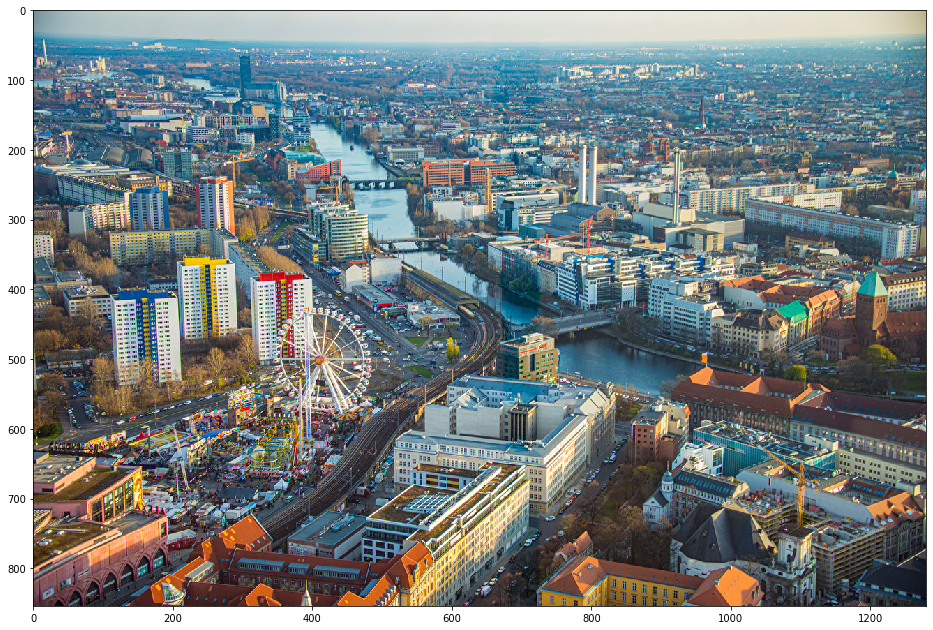

In [141]:
plt.imshow(image)
plt.show()

In [303]:
# Kmeans
segmented_image0 = segmented_image_show0.reshape(image.shape)
segmented_image = segmented_image_show.reshape(image.shape)
segmented_image1 = segmented_image_show1.reshape(image.shape)
segmented_image2 = segmented_image_show2.reshape(image.shape)
segmented_image3 = segmented_image_show3.reshape(image.shape)
segmented_image4 = segmented_image_show4.reshape(image.shape)
segmented_image5 = segmented_image_show5.reshape(image.shape)
segmented_image6 = segmented_image_show6.reshape(image.shape)

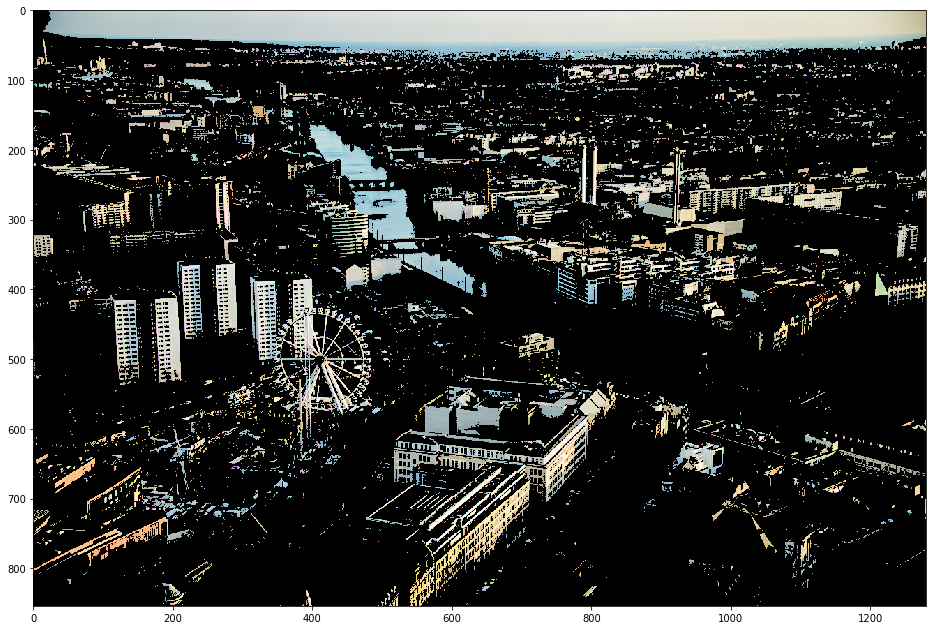

In [156]:
# disable one cluster (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 1
masked_image[labels != cluster] = [0, 0, 0]
# convert back to original shape
masked_image = masked_image.reshape(image.shape)
# show the image
plt.imshow(masked_image)
plt.show()

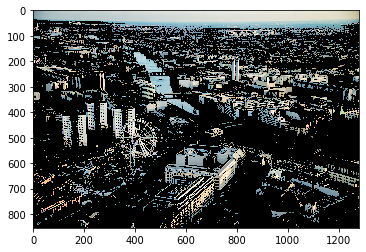

In [26]:
# enable one cluster
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 3
masked_image[labels2 != cluster] = [0, 0, 0]
# convert back to original shape
masked_image2 = masked_image.reshape(image.shape)
# show the image
plt.imshow(masked_image2)
plt.show()

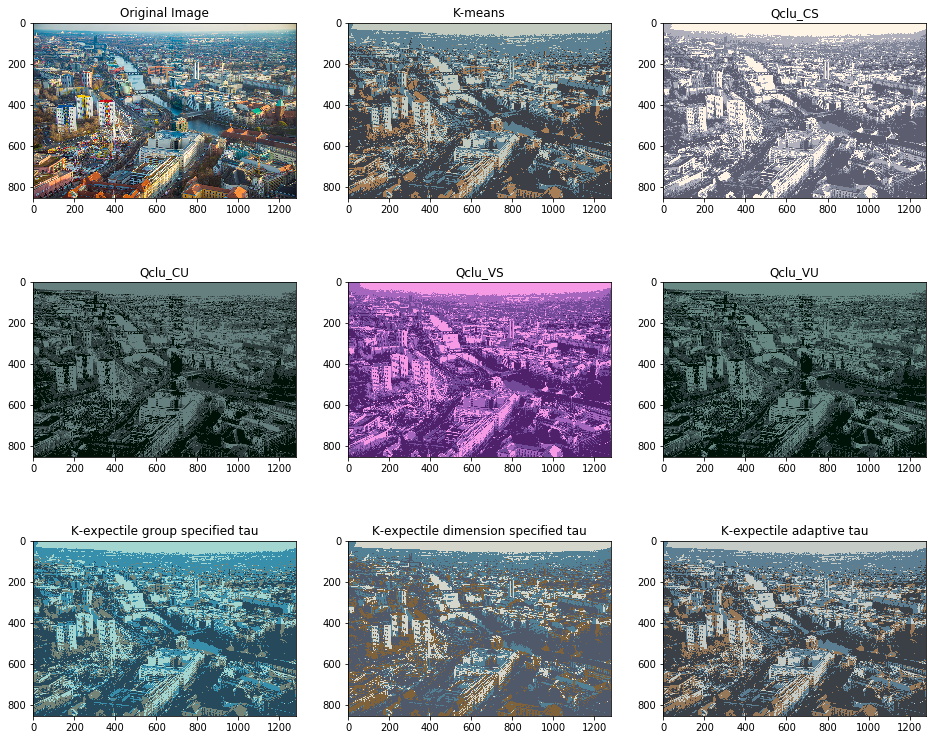

In [143]:
plt.rcParams['figure.figsize'] = (16,13.5)
plt.subplot(331)
plt.imshow(image)
plt.title('Original Image')


plt.subplot(332)
plt.imshow(segmented_image0)
plt.title('K-means')

plt.subplot(333)
plt.imshow(segmented_image1)
plt.title('Qclu_CS')

plt.subplot(334)
plt.imshow(segmented_image2)
plt.title('Qclu_CU')

plt.subplot(335)
plt.imshow(segmented_image3)
plt.title('Qclu_VS')

plt.subplot(336)
plt.imshow(segmented_image4)
plt.title('Qclu_VU')

plt.subplot(337)
plt.imshow(segmented_image5)
plt.title('K-expectile group specified tau')

plt.subplot(338)
plt.imshow(segmented_image6)
plt.title('K-expectile dimension specified tau')

plt.subplot(339)
plt.imshow(segmented_image)
plt.title('K-expectile adaptive tau')
plt.savefig('overall_view_berlin.png',transparent=True)

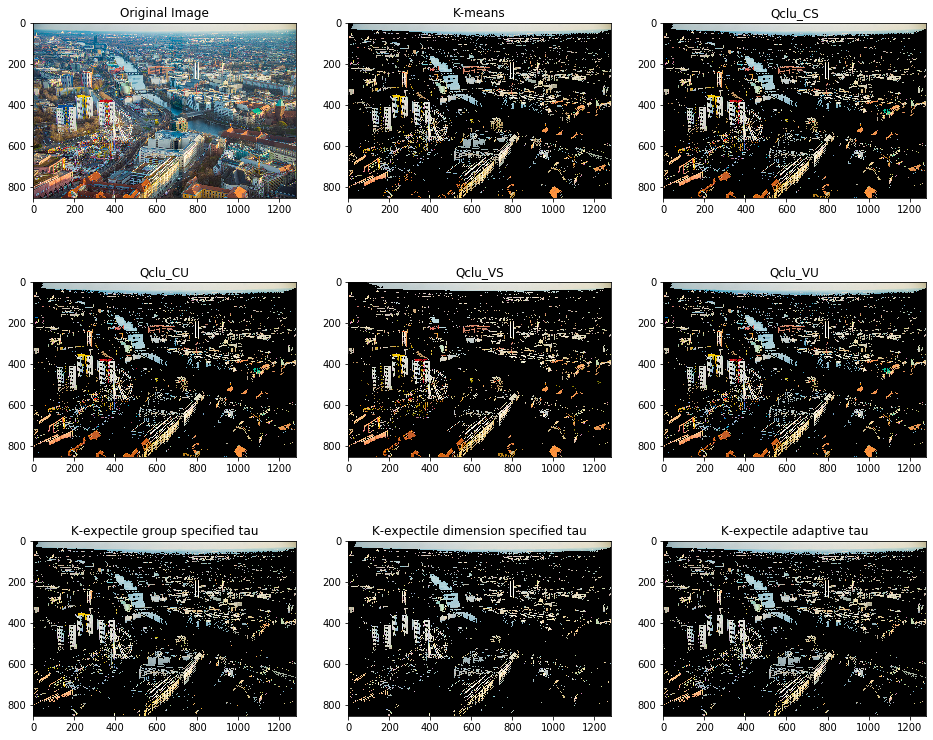

In [364]:
plt.rcParams['figure.figsize'] = (16,13.5)
plt.subplot(331)
plt.imshow(image)
plt.title('Original Image')


plt.subplot(332)
plt.imshow(masked_image0)
plt.title('K-means')


plt.subplot(333)
plt.imshow(masked_image1)
plt.title('Qclu_CS')

plt.subplot(334)
plt.imshow(masked_image2)
plt.title('Qclu_CU')

plt.subplot(335)
plt.imshow(masked_image3)
plt.title('Qclu_VS')

plt.subplot(336)
plt.imshow(masked_image4)
plt.title('Qclu_VU')

plt.subplot(337)
plt.imshow(masked_image5)
plt.title('K-expectile group specified tau')

plt.subplot(338)
plt.imshow(masked_image6)
plt.title('K-expectile dimension specified tau')

plt.subplot(339)
plt.imshow(masked_image)
plt.title('K-expectile adaptive tau')
plt.savefig('cluster_view_berlin.png',transparent=True)

In [83]:
from sklearn.metrics import mean_squared_error
rms0 = mean_squared_error(pixel_values, segmented_image_show, squared=False)

In [454]:
original_cl = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
cl0 = cv2.cvtColor(segmented_image0, cv2.COLOR_BGR2YCrCb)
cl = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2YCrCb)
cl7 = cv2.cvtColor(segmented_image7, cv2.COLOR_BGR2YCrCb)
cl1 = cv2.cvtColor(segmented_image1, cv2.COLOR_BGR2YCrCb)
cl2 = cv2.cvtColor(segmented_image2, cv2.COLOR_BGR2YCrCb)
cl3 = cv2.cvtColor(segmented_image3, cv2.COLOR_BGR2YCrCb)
cl4 = cv2.cvtColor(segmented_image4, cv2.COLOR_BGR2YCrCb)
cl5 = cv2.cvtColor(segmented_image5, cv2.COLOR_BGR2YCrCb)
cl6 = cv2.cvtColor(segmented_image6, cv2.COLOR_BGR2YCrCb)

In [455]:
original_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray0 = cv2.cvtColor(segmented_image0, cv2.COLOR_BGR2GRAY)
gray = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)
gray7 = cv2.cvtColor(segmented_image7, cv2.COLOR_BGR2GRAY)
gray1 = cv2.cvtColor(segmented_image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(segmented_image2, cv2.COLOR_BGR2GRAY)
gray3 = cv2.cvtColor(segmented_image3, cv2.COLOR_BGR2GRAY)
gray4 = cv2.cvtColor(segmented_image4, cv2.COLOR_BGR2GRAY)
gray5 = cv2.cvtColor(segmented_image5, cv2.COLOR_BGR2GRAY)
gray6 = cv2.cvtColor(segmented_image6, cv2.COLOR_BGR2GRAY)

In [446]:
def cal_mse_rgb(imageA, imageB):
# the 'Mean Squared Error' between the two images is the
# sum of the squared difference between the two images;
# NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1] * imageA.shape[2])

# return the MSE, the lower the error, the more "similar"
# the two images are
    return err

In [236]:
def cal_mse(imageA, imageB):
# the 'Mean Squared Error' between the two images is the
# sum of the squared difference between the two images;
# NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

# return the MSE, the lower the error, the more "similar"
# the two images are
    return err

In [447]:
mse0 = cal_mse_rgb(image, segmented_image0)
mse = cal_mse_rgb(image, segmented_image)
mse7 = cal_mse_rgb(image, segmented_image7)
mse1 = cal_mse_rgb(image, segmented_image1)
mse2 = cal_mse_rgb(image, segmented_image2)
mse3 = cal_mse_rgb(image, segmented_image3)
mse4 = cal_mse_rgb(image, segmented_image4)
mse5 = cal_mse_rgb(image, segmented_image5)
mse6 = cal_mse_rgb(image, segmented_image6)

In [456]:
g_mse0 = cal_mse(original_gray, gray0)
g_mse = cal_mse(original_gray, gray)
g_mse7 = cal_mse(original_gray, gray7)
g_mse1 = cal_mse(original_gray, gray1)
g_mse2 = cal_mse(original_gray, gray2)
g_mse3 = cal_mse(original_gray, gray3)
g_mse4 = cal_mse(original_gray, gray4)
g_mse5 = cal_mse(original_gray, gray5)
g_mse6 = cal_mse(original_gray, gray6)

In [457]:
cl_mse0 = cal_mse(original_cl, cl0)
cl_mse = cal_mse(original_cl, cl)
cl_mse7 = cal_mse(original_cl, cl7)
cl_mse1 = cal_mse(original_cl, cl1)
cl_mse2 = cal_mse(original_cl, cl2)
cl_mse3 = cal_mse(original_cl, cl3)
cl_mse4 = cal_mse(original_cl, cl4)
cl_mse5 = cal_mse(original_cl, cl5)
cl_mse6 = cal_mse(original_cl, cl6)

In [451]:
rgb_psnr0 = cal_psnr_rgb(image, segmented_image0)
rgb_psnr = cal_psnr_rgb(image, segmented_image)
rgb_psnr7 = cal_psnr_rgb(image, segmented_image7)
rgb_psnr1 = cal_psnr_rgb(image, segmented_image1)
rgb_psnr2 = cal_psnr_rgb(image, segmented_image2)
rgb_psnr3 = cal_psnr_rgb(image, segmented_image3)
rgb_psnr4 = cal_psnr_rgb(image, segmented_image4)
rgb_psnr5 = cal_psnr_rgb(image, segmented_image5)
rgb_psnr6 = cal_psnr_rgb(image, segmented_image6)

In [458]:
g_psnr0 = cal_psnr(original_gray, gray0)
g_psnr = cal_psnr(original_gray, gray)
g_psnr7 = cal_psnr(original_gray, gray7)
g_psnr1 = cal_psnr(original_gray, gray1)
g_psnr2 = cal_psnr(original_gray, gray2)
g_psnr3 = cal_psnr(original_gray, gray3)
g_psnr4 = cal_psnr(original_gray, gray4)
g_psnr5 = cal_psnr(original_gray, gray5)
g_psnr6 = cal_psnr(original_gray, gray6)

In [459]:
cl_psnr0 = cal_psnr(original_cl, cl0)
cl_psnr = cal_psnr(original_cl, cl)
cl_psnr7 = cal_psnr(original_cl, cl7)
cl_psnr1 = cal_psnr(original_cl, cl1)
cl_psnr2 = cal_psnr(original_cl, cl2)
cl_psnr3 = cal_psnr(original_cl, cl3)
cl_psnr4 = cal_psnr(original_cl, cl4)
cl_psnr5 = cal_psnr(original_cl, cl5)
cl_psnr6 = cal_psnr(original_cl, cl6)

In [460]:
g_mse0,g_mse,g_mse7,g_mse1,g_mse2,g_mse3,g_mse4,g_mse5,g_mse6

(428.95460974092504,
 428.82623591188525,
 430.2803406762295,
 2198.212476214871,
 2788.1003796472482,
 526.5445321648126,
 2557.3560853337235,
 522.3172744072014,
 891.3311063744145)

In [452]:
mse0,mse,mse7,mse1,mse2,mse3,mse4,mse5,mse6

(742.5330070501561,
 742.1946480410812,
 741.1723985777712,
 2841.6139136904762,
 3639.4699215700625,
 2398.978220140515,
 3507.04126689354,
 1203.657752427303,
 1214.553381757416)

In [453]:
rgb_psnr0,rgb_psnr,rgb_psnr7,rgb_psnr1,rgb_psnr2,rgb_psnr3,rgb_psnr4,rgb_psnr5,rgb_psnr6

(28.966071066464195,
 28.96805051976775,
 28.974036325807283,
 23.1375779972217,
 22.06284735806808,
 23.872965651971487,
 22.223819941095915,
 26.86819852955071,
 26.82906262740234)

In [461]:
cl_mse0,cl_mse,cl_mse7,cl_mse1,cl_mse2,cl_mse3,cl_mse4,cl_mse5,cl_mse6

(839.120822050644,
 836.544306206089,
 835.6639143003513,
 2886.3432111753514,
 3546.7662315207845,
 2799.5711669350117,
 3332.153650102459,
 1449.733722738583,
 1304.8621267564404)

In [462]:
g_psnr0,g_psnr,g_psnr7,g_psnr1, g_psnr2, g_psnr3,g_psnr4,g_psnr5,g_psnr6

(21.80669021554918,
 21.807990129070724,
 21.793288570602233,
 14.710106924402137,
 13.677719553077473,
 20.916452536168983,
 14.052891576250698,
 20.95145971531652,
 18.63041297729496)

In [463]:
cl_psnr0,cl_psnr,cl_psnr7,cl_psnr1,cl_psnr2,cl_psnr3,cl_psnr4,cl_psnr5,cl_psnr6

(18.89255863004584,
 18.905914132607695,
 18.910487120315956,
 13.527323896692419,
 12.632477959387485,
 13.65988848846044,
 12.903553417666757,
 16.517921195742304,
 16.975157348274315)

In [450]:
def cal_psnr(img1, img2, max_value=255):
    """"Calculating peak signal-to-noise ratio (PSNR) between two images."""
    #mse = np.mean((np.array(img1, dtype=np.float32) - np.array(img2, dtype=np.float32)) ** 2)
    mse = cal_mse(img1, img2)
    if mse == 0:
        return 100
    return 20 * np.log10(max_value / (np.sqrt(mse)))

In [448]:
def cal_psnr_rgb(img1, img2, max_value=255*3):
    """"Calculating peak signal-to-noise ratio (PSNR) between two images."""
    mse = cal_mse_rgb(img1, img2)
    if mse == 0:
        return 100
    return 20 * np.log10(max_value / (np.sqrt(mse)))

In [202]:
#Euclidean distance
def dist(a, b):
    return np.linalg.norm(a - b, None)
#Tau-distance
def tau_dist_fun(x, centroid, tau):
    arr = x - centroid
    tau_ar = tau[None:,:]
    neg = np.array([arr<0],dtype=np.int32)
    pos = np.array([arr>=0],dtype=np.int32)
    w_pos = pos * tau_ar
    w_neg = neg * (1-tau_ar)
    dist = (arr ** 2 * w_pos).sum(axis = arr.ndim) + (arr ** 2 * w_neg).sum(axis = arr.ndim)
    return dist
#get centroids
def get_closest_centroid(x, centroid, tau):
    # Loop over each centroid and compute the distance from data point.
    dist = tau_dist_fun(x, centroid, tau)
    # Get the index of the centroid with the smallest distance to the data point
    assigned_centroids = np.argmin(dist, axis = 2)
    clusters = np.squeeze(assigned_centroids)
    return clusters
#Expectile estimation
def expectile_fun_c(group, tau):
    e = np.mean(group, axis=0)
    e_new = np.zeros(e.shape)
    while dist(e_new , e) != 0:
        res = group - e
        e = copy.deepcopy(e_new)
        neg = np.array([res<0],dtype = np.int32)
        pos = np.array([res>=0],dtype= np.int32)
        norm = pos.sum(axis=1)*tau + neg.sum(axis=1)*(1-tau)
        e_arr = (tau * (group * pos).sum(axis=1) + (1-tau) * (group * neg).sum(axis=1))/norm
        e_new = np.squeeze(e_arr)
    return e_new
#Estimate optimal taus
def tau_fun_c(group, e):
    res = group - e
    neg = np.array([res<0],dtype = np.int32)
    pos = np.array([res>=0],dtype= np.int32)
    neg_s = -(neg*res).sum(axis=1)/neg.sum(axis=1)
    pos_s = (pos*res).sum(axis=1)/pos.sum(axis=1)
    c = neg_s/pos_s
    tau = c/(1+c)
    return tau
# Define K expectile clustering 
# Main function
def k_expectile_vtau_c(X, k, ite):
    X = np.array(X)
# Initialize cluster centers as K means cluster centers
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    C = kmeans.cluster_centers_

# To store the value of centroids when it updates
    C_old = np.zeros(C.shape)
# Initialize tau = 0.5
    tau = np.ones(C.shape)*0.5
# Error func. - Distance between new centroids and old centroids
    error = dist(C, C_old)
# main loop   
    for r in range(ite):
    #while error >= ite:
        # Get closest centroids to each data point
        assigned_clusters = get_closest_centroid(X[:, None, :], C[None,:, :], tau)
        # Storing the old centroid values
        C_old = copy.deepcopy(C)
        # Compute new centroids
        for c in range(k):
            # Get data points belonging to each cluster 
            cluster_members = X[assigned_clusters == c]
        
            # Compute the centroids of the clusters
            C[c] = expectile_fun_c(cluster_members, tau[c])
        
            # Update the tau
            tau[c] = tau_fun_c(cluster_members, C[c])
        error = dist(C, C_old)
        print(tau)
        print(error)
    return C, assigned_clusters

In [4]:
def k_expectile_utau_c(X, k,tau):
    X = np.array(X)
# Initialize cluster centers as K means cluster centers
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    C = kmeans.cluster_centers_

# To store the value of centroids when it updates
    C_old = np.zeros(C.shape)
# Error func. - Distance between new centroids and old centroids
    error = dist(C, C_old)
# main loop   
    for r in range(30):
        # Get closest centroids to each data point
        assigned_clusters = get_closest_centroid(X[:, None, :], C[None,:, :], tau)
        # Storing the old centroid values
        C_old = copy.deepcopy(C)
        # Compute new centroids
        for c in range(k):
            # Get data points belonging to each cluster 
            cluster_members = X[assigned_clusters == c]
            # Compute the centroids of the clusters
            C[c] = expectile_fun_c(cluster_members, tau[c])
        error = dist(C, C_old)
        print(error)
    return C, assigned_clusters